## Import software libraries

Import the primary modules that will be used in this project:

In [1]:
import os  # Interact with the operating system
import sys  # Read system parameters

import matplotlib  # Create 2D charts
import numpy as np  # Work with multi-dimensional arrays and matrices
import pandas as pd  # Manipulate and analyze data
import scipy as sp  # Perform scientific computing and advanced mathematics
import seaborn as sb  # Perform data visualization
import sklearn  # Perform data mining and analysis

# Summarize software libraries used
print("Libraries used in this project:")
print("- NumPy {}".format(np.__version__))
print("- Pandas {}".format(pd.__version__))
print("- Matplotlib {}".format(matplotlib.__version__))
print("- SciPy {}".format(sp.__version__))
print("- Scikit-learn {}".format(sklearn.__version__))
print("- Python {}\n".format(sys.version))

Libraries used in this project:
- NumPy 1.24.3
- Pandas 2.0.3
- Matplotlib 3.7.2
- SciPy 1.10.1
- Scikit-learn 1.3.2
- Python 3.8.18 | packaged by conda-forge | (default, Dec 23 2023, 17:23:49) 
[Clang 15.0.7 ]



## Load the Dataset

To analyze the price of a home  through multiple inputs in King County, load the dataset into `DataFrame`. Once loaded as `DataFrame` the data can be explored and visualized with pandas.

In [2]:
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "housing_data")
print("Data files in this project:", os.listdir(DATA_PATH))

# Read the raw dataset
raw_housing_data_file = os.path.join(DATA_PATH, "kc_house_data.csv")
raw_housing_data = pd.read_csv(raw_housing_data_file)
print(
    "Loaded {} records from {}.\n".format(len(raw_housing_data), raw_housing_data_file)
)

Data files in this project: ['.ipynb_checkpoints', 'kc_house_data.csv']
Loaded 21613 records from ./housing_data/kc_house_data.csv.



## Dataset Information


#### View features and data types

Column Labels:
- **id**—Unique identifier for each house sold.
- **date**—Date of the house's most recent sale.
- **price**—Price the house most recently sold for.
- **bedrooms**—Number of bedrooms in the house.
- **bathrooms**—Number of bathrooms. A room with a toilet but no shower is counted as 0.5.
- **sqft_living**—Square footage of the house's interior living space.
- **sqft_lot**—Square footage of the lot on which the house is located.
- **floors**—Number of floor levels in the house.
- **waterfront**—Whether the property borders on or contains a body of water. (0 = not waterfront, 1 =
waterfront)
- **view**—An index from 0 to 4 representing the subjective quality of the view from the property. The
higher the number, the better the view.
- **condition**—An index from 1 to 5 representing the subjective condition of the property. The higher
the number, the better the condition.
- **grade**—An index from 0 to 14 representing the quality of the building's construction and design.
The higher the number, the better the grade.
- **sqft_above**The square footage of the interior housing space that is above ground level.
- **sqft_basement**—The square footage of the interior housing space that is below ground level.
- **yr_built**—The year the house was initially built.
- **yr_renovated**—The year of the house's last renovation.
- **zipcode**—What zipcode area the house is located within.
- **lat**—Latitude of the house's location.
- **long**—Longitude of the house's location.
- **sqft_living15**—The square footage of interior housing living space for the nearest 15 neighbors.
- **sqft_lot15**—The square footage of the lan

In [3]:
print(raw_housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- 21,613 records ("entries" regarding a particular house) are in the dataset.
- There are 21 columns in the dataset.
- Each column in the dataset is listed, along with its data type and the number of records that
include a data value.
- Five columns contain floating point number values: price, bathrooms, floors, lat, and
long.
- Fifteen columns contain integer number values: id, bedrooms, sqft_living, sqft_lot,
waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built,
yr_renovated, zipcode, sqft_living15, and sqft_lot15.
- One column (date) contains a date value (reported as an "object" value).
- There are no missing data values. Each column contains 21,613 entries.

### Display samples

You can see significant variation in prices, number of bedrooms and bathrooms, living space, even in this small sample.

In [4]:
# View first ten records
print(raw_housing_data.head(10))

           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

## Data Characteristics - Statistical Measures

### Descriptive summary statistics

In [5]:
with pd.option_context("float_format", "{:.2f}".format):
    print(raw_housing_data.describe())

                 id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21613.00   21613.00  21613.00   21613.00     21613.00   21613.00   
mean  4580301520.86  540088.14      3.37       2.11      2079.90   15106.97   
std   2876565571.31  367127.20      0.93       0.77       918.44   41420.51   
min      1000102.00   75000.00      0.00       0.00       290.00     520.00   
25%   2123049194.00  321950.00      3.00       1.75      1427.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900445.00  645000.00      4.00       2.50      2550.00   10688.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  \
count 21613.00    21613.00 21613.00   21613.00 21613.00    21613.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.39   
std       0.54        0.09     0.77       0.65     1.18      828.09   
min 

### Summarize the most common values


In [6]:
# Summarize most common values for features with non-continuous or categorical values
features_to_summarize = [
    "view",
    "waterfront",
    "grade",
    "zipcode",
    "bedrooms",
    "bathrooms",
    "floors",
]
raw_housing_data[features_to_summarize].mode()

,view,waterfront,grade,zipcode,bedrooms,bathrooms,floors
0,0,0,7,98103,3,2.5,1.0


The typical house:
- Does not have a "view" and is not on the waterfront.
- Has a grade of 7.
- Has a zipcode of 98103.
- Has 3 bedrooms, 2.5 bathrooms, and 1 floor level.

### Show feature correlations with price

Convert **date** column to datetime in preparation for Pearson's Correlation Coefficient

In [7]:
print("'date' column before conversion:\n")
print(raw_housing_data.date.info())
raw_housing_data.date = pd.to_datetime(raw_housing_data.date)
print("'date' column after conversion:\n")
print(raw_housing_data.date.info())

'date' column before conversion:

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
21613 non-null  object
dtypes: object(1)
memory usage: 169.0+ KB
None
'date' column after conversion:

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21613 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.0 KB
None


#### Calculate Pearson's Correlation Coefficient

- **sqft_living** is the feature that has the strongest correlation to **price**
- condition, sqft_lot15, sqft_lot, and waterfront have weak correlations to price
- The perfect 1.0 for price can be dsiregarded as it simply indicates that price perfectly correlates with itself.

In [8]:
# # Look for correlations with price using Pearson correlation coefficient
print("Pearson correlations with price")
corr_matrix = raw_housing_data.corr()
corr_matrix["price"].sort_values(ascending=False)

Pearson correlations with price


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Analyze cross correlations

Use Matplotlib for visualizing the correlation matrix

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

1. Define the visualization's size and title and plot the correlation matrix as a heatmap.

2. Reorder the features to align with Pearson's Correlation output above for visualization purposes.

    - Starting with price will make it easier to compare the other features to it. 

3. Use Seaborn library to plot the correlation matrix as a heatmap


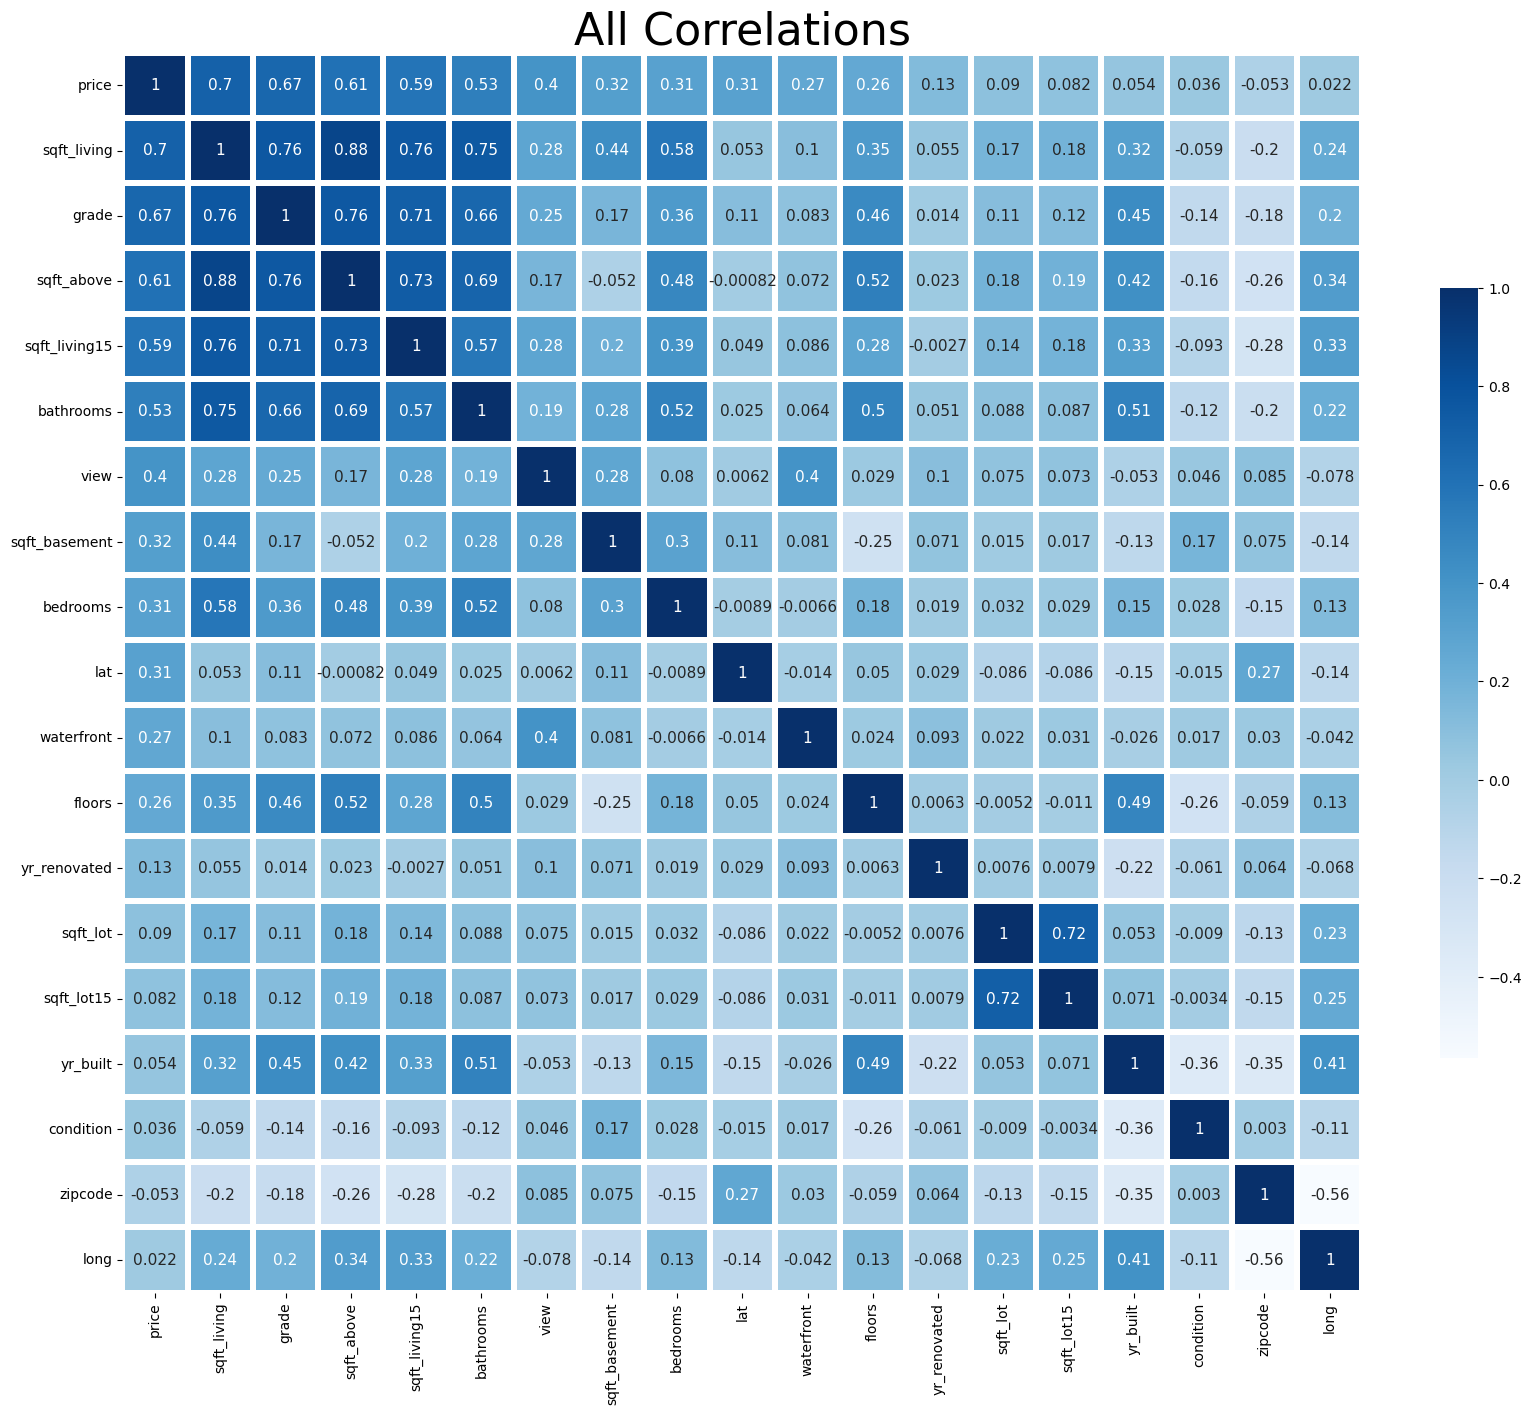

In [10]:
f, axes = plt.subplots(figsize=(20, 20))
plt.title("All Correlations", fontsize=32)

features = [
    "price",
    "sqft_living",
    "grade",
    "sqft_above",
    "sqft_living15",
    "bathrooms",
    "view",
    "sqft_basement",
    "bedrooms",
    "lat",
    "waterfront",
    "floors",
    "yr_renovated",
    "sqft_lot",
    "sqft_lot15",
    "yr_built",
    "condition",
    "zipcode",
    "long",
]

#  Plot the correlation matrix as a heatmap using the Seaborn library
sb.heatmap(
    raw_housing_data[features].corr(),
    linewidths=3.0,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 11},
    cbar_kws={"shrink": 0.5},
);

### Visualize the distribution of features using a histogram

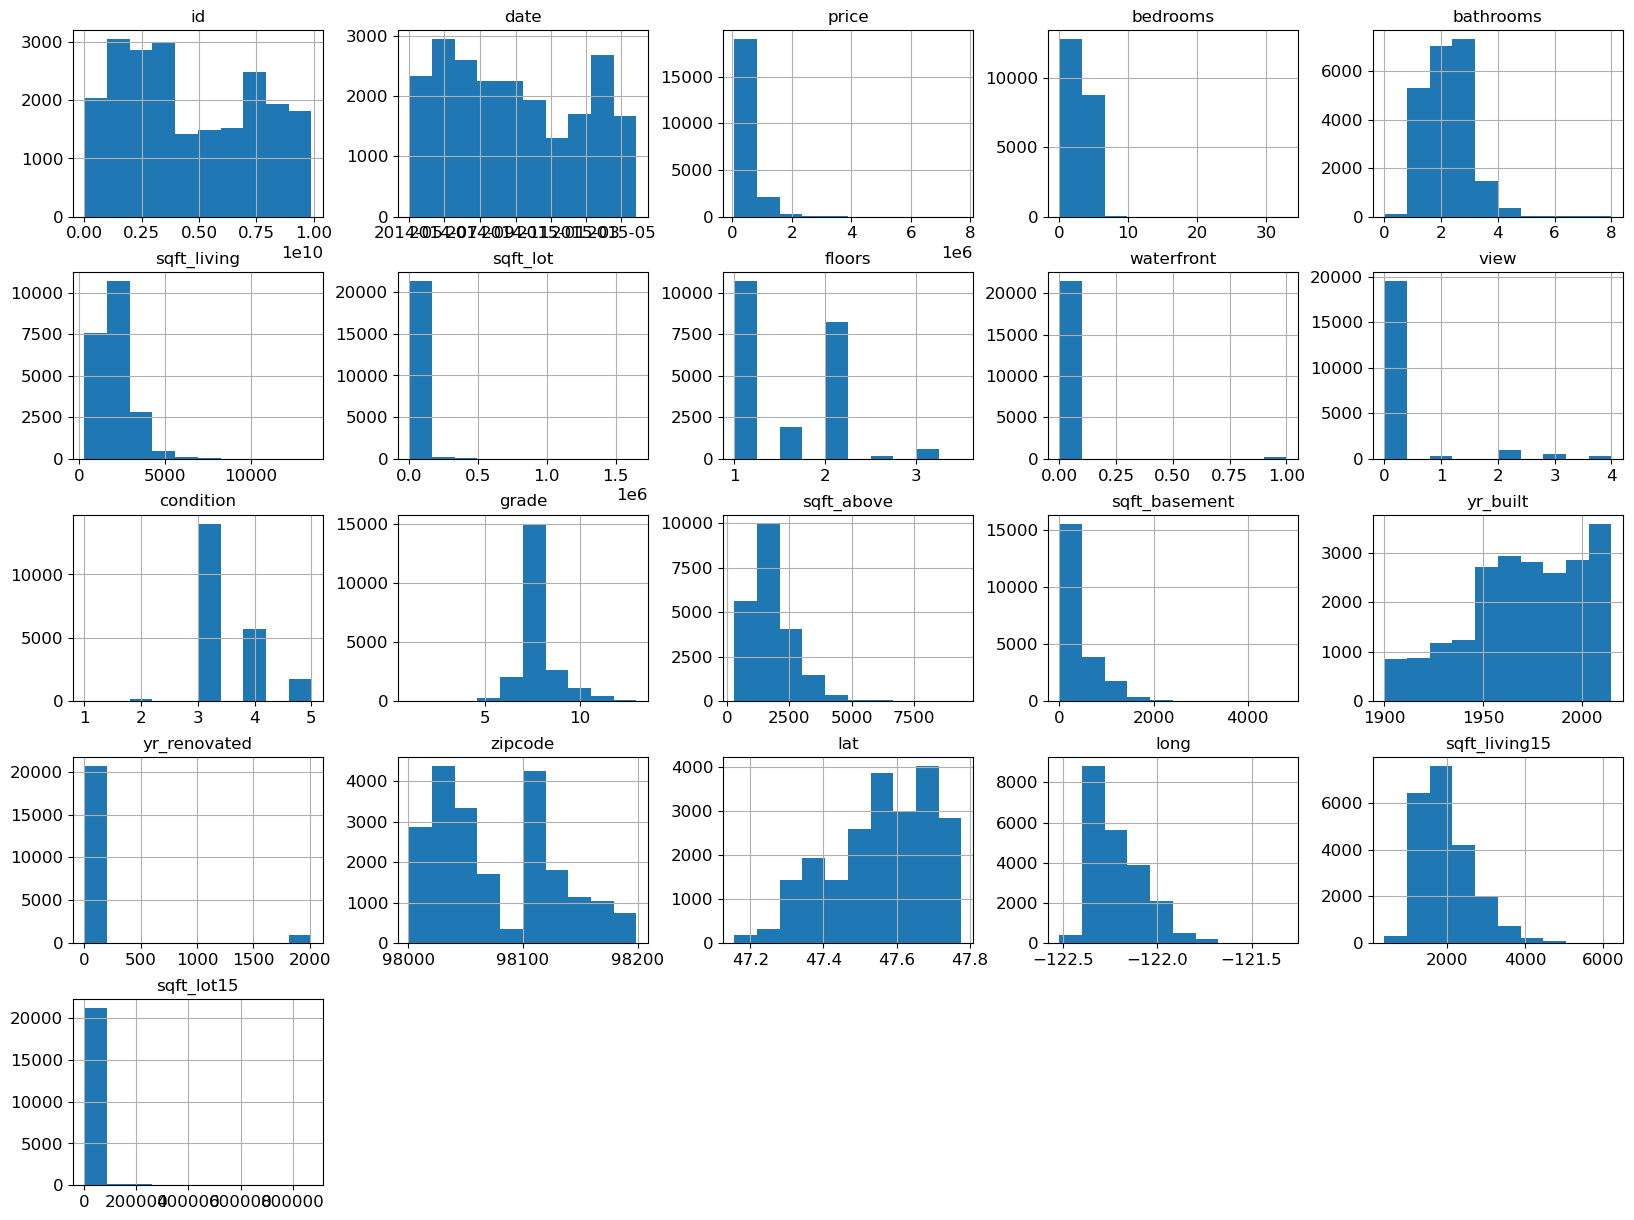

<Figure size 640x480 with 0 Axes>

In [11]:
# Define  the font size to be used for the histograms' axis titles and tick mark labels
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# Create a histogram for each column of numeric data in the dataset.
raw_housing_data.hist(figsize=(20, 15))

# Plot the figure using the settings configured in lines 1 through 3
plt.figure();

- Features such as **bathrooms, bedrooms, and sqft_living** closely approximate a normal distribution.
- Features like **zipcode** do not approximate a normal distribution.
- The **yr_built** values are skewed, but feasibly follow the general house-building pattern over the years
- There is a possibility of outlier data values in the bedrooms column given that the x-axis of the histogram extends beyond 30. A deeper investigation may be in order. There appears to be a similar issue with the **price** histogram.
- Several features have a central tendency that can be observed:
    -  **condition (3)**
    -  **bathrooms(2.5)**
    -  **floors (1)**
    -  **grade (7)**

### Get insights regarding location using  a geographic map visual

Next is to explore the relationship between **price and location**

In [12]:
# Only plot every Nth house. This avoids overwhelming the visualization tool.
number_of_homes = 20
raw_housing_data_subset = raw_housing_data.sort_values(by=["price"], ascending=False)[
    ::number_of_homes
]

# Display maximum house price
maximum_house_price = raw_housing_data_subset.loc[
    raw_housing_data_subset["price"].idxmax()
]["price"]
print(f"The maximum price for a home in this dataset is ${maximum_house_price:,.0f}")

# King County building grade descriptions
# Feature values obtained from http://www5.kingcounty.gov/sdc/FGDCDocs/resbldg_extr_faq.htm
building_grades = [
    "Unknown",
    "Cabin",
    "Substandard",
    "Poor",
    "Low",
    "Fair",
    "Low Average",
    "Average",
    "Good",
    "Better",
    "Very Good",
    "Excellent",
    "Luxury",
    "Mansion",
    "Exceptional Properties",
]

# Plot values on a map using the Folium library.
import folium

# Create the base map centered on King County.
king_county_base_map = folium.Map(
    location=[47.5300, -122.2000],
    control_scale=True,
    max_zoom=20,
    zoom_start=10,
    zoom_control=True,
)

# Plot homes by price.
for index, row in raw_housing_data_subset.iterrows():

    # Get the grade description for this row.
    grade_desc = building_grades[row["grade"]]
    waterfront_desc = "Yes" if (row["waterfront"] == 1) else "No"

    # Add popup text. Click each point to show details.
    popup_text = "<br>".join(
        [
            "King&nbsp;County&nbsp;Housing&nbsp;Sales&nbsp;Data",
            "Price:&nbsp;${:,.0f}",
            "Sqft&nbsp;Living:&nbsp;{:,.0f}",
            "Grade:&nbsp;{}&nbsp;({})",
            "Location:&nbsp;[{:.3f},{:.3f}]",
            "Waterfront:&nbsp;{}",
            "Zipcode:&nbsp;{}",
        ]
    )

    popup_text = popup_text.format(
        row["price"],
        row["sqft_living"],
        row["grade"],
        grade_desc,
        row["lat"],
        row["long"],
        waterfront_desc,
        row["zipcode"],
    )

    # Add each home to the map, but show larger dots for higher prices.
    scaling_value = row["price"] / maximum_house_price  # 1.0 for highest price.
    folium.CircleMarker(
        [row["lat"], row["long"]],
        radius=25 * scaling_value,
        weight=1,
        fill=True,
        fillColor="#0000FF",
        fillOpacity=0.7,
        color="#0000FF",
        opacity=0.7,
        popup=popup_text,
    ).add_to(king_county_base_map)

king_county_base_map

The maximum price for a home in this dataset is $7,700,000


NOTE: The map above dragable and zoomable, and the blue circles are clickable(information)
- The map displays homes for King County, Washington
- Above the map the maximum price for a home in the county is displayed: **$7,700,000**
- Every house from the dataset is represented on the map as a dot. A dot's size is indicative of the price of the house. 

Here patterns appear to exist regarding location and house price. Expensive homes appear clustered around the lakes in Bellvue and Seattle, Lake Washington, and Lake Sammamish. Some expensive homes are not on the lake, however. Homes that are less expensive tend to be located in areas other than Bellvue and Seattle such as Federal Way, Auburn, Covington, Maple Valley, and Enumclaw - the southern sector of the county.

### Split Training and Testing Datasets and Labels 

It has been observed that the housing dataset is in good shape. No missing values need to be added as all rows have data and **date** is the only row that required conversion.  Some attributes have been identified as inessential and will not be used to train the model. 

**Feature Not Used**                            | **Rationale**
_______________________________
**id and date**        |   The id and date values just identify the record and the date the house
                        was sold. They have no bearing on price.
                        
**sqft_above**        |   The sqft_living and sqft_above features showed a high correlation
                          with each other (0.88), so using both features in the model may be redundant.
                          The sqft_living feature showed a 0.70 correlation with price, whereas
                          sqft_above showed only a 0.61 correlation with price. So of these two
                          features, sqft_living will be the more useful one to predict the price.
                          
**sqft_living15** and **sqft_lot15**         |   These features summarize the size of the house and lot for the 15                                                        nearest properties. They don't directly describe the property itself.                                                     While this might provide some indication of the neighborhood, the                                                         house's own measurements (sqft_living and sqft_lot) show a stronger                                                       correlation with price than these measures of the house's neighbors.


**Remaining Features**
The remaining features  include **sqft_living, grade, bathrooms, view, sqft_basement, bedrooms, lat, waterfront, floors, yr_renovated, sqft_lot, yr_built, condition, long, and zipcode**.

Next, split the testing data from the training data and separate the house prices from the dataset. **Price** should not be included in the training or testing datasets considering that it is the output the model will produce. Keeping a copy of the labels to verify the results is necessary. 

In [13]:
from sklearn.model_selection import train_test_split

# Remove Price(predicted value / dependent variable) from the training data and place in a separate dataframe name labels
label_columns = ["price"]

# Identifies the column that you'll include in the DataFrame that will contain the labels for machine learning
training_columns = [
    #  Identify the columns that you'll include in the DataFrame that contains the attributes (the independent variables)
    #  he model will use to determine the price.
    "sqft_living",
    "grade",
    "bathrooms",
    "view",
    "sqft_basement",
    "bedrooms",
    "lat",
    "waterfront",
    "floors",
    "yr_renovated",
    "sqft_lot",
    "yr_built",
    "condition",
    "long",
    "zipcode",
]

# Split dependent and independent variables.
data_train, data_test, data_train_labels, data_test_labels = train_test_split(
    raw_housing_data[training_columns], raw_housing_data[label_columns], random_state=42
)

# Compare the number of rows and columns in the original data to the training and testing sets
print(f"Original Set:      {raw_housing_data.shape}")
print("------------------------------")
print(f"Training Features: {data_train.shape}")
print(f"Testing Features:  {data_test.shape}")
print(f"Training Labels:   {data_train_labels.shape}")
print(f"Testing Labels:    {data_test_labels.shape}")

Original Set:      (21613, 21)
------------------------------
Training Features: (16209, 15)
Testing Features:  (5404, 15)
Training Labels:   (16209, 1)
Testing Labels:    (5404, 1)


- The training features and labels include 16,209 of the original 21,613 records, whereas the
testing features and labels include only 5,404 records.
- The features datasets include 15 of the original 21 columns, whereas the labels include only 1
column (for price).

### Set Up and Train Model

In [14]:
from time import time

from sklearn.linear_model import LinearRegression

# Create a linear regression model
regressor = LinearRegression()

# Fit the model using training data and labels
start = time()
regressor.fit(data_train, data_train_labels)
end = time()
train_time = (end - start) * 1000
print("Linear Regression Model took {:,.2f} milliseconds to fit.".format(train_time))

Linear Regression Model took 10.78 milliseconds to fit.


### Evaluate the Model Using the Holdout Dataset

In [15]:
# Use test data and labels to test the model's performance
score = regressor.score(data_test, data_test_labels)
"Score: {}%".format(int(round(score * 100)))

'Score: 70%'

- The highest score possible is 100%. The score can be negative.
- The initial output score of 70% indicates that the model is 70% accurate at predicting the price of a house. It maybe possible to improve on this score with some adjustments. TBD...

### Predicted and Actual Values Comparison

Next is to view a comparison of the first ten predicted prices to actual prices

In [16]:
predicted_prices = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions["predicted"] = predicted_prices

# Display examples comparing actual to predicted prices
with pd.option_context("float_format", "${:,.2f}".format):
    print(predictions.head(10))

              price     predicted
735     $365,000.00   $451,576.87
2830    $865,000.00   $745,528.73
4106  $1,038,000.00 $1,234,144.11
16218 $1,490,000.00 $1,659,505.67
19964   $711,000.00   $737,851.90
1227    $211,000.00   $284,352.79
18849   $790,000.00   $832,187.44
19369   $680,000.00   $490,462.65
20164   $384,500.00   $392,922.89
7139    $605,000.00   $471,310.48


- The actual prices and the predicted prices are associated approximately, but the degree of accuracy, at this stage, may be deficient suggesting that the model could possibly benefit from some improvement.  

### Chart the Predictions to the Actual Values

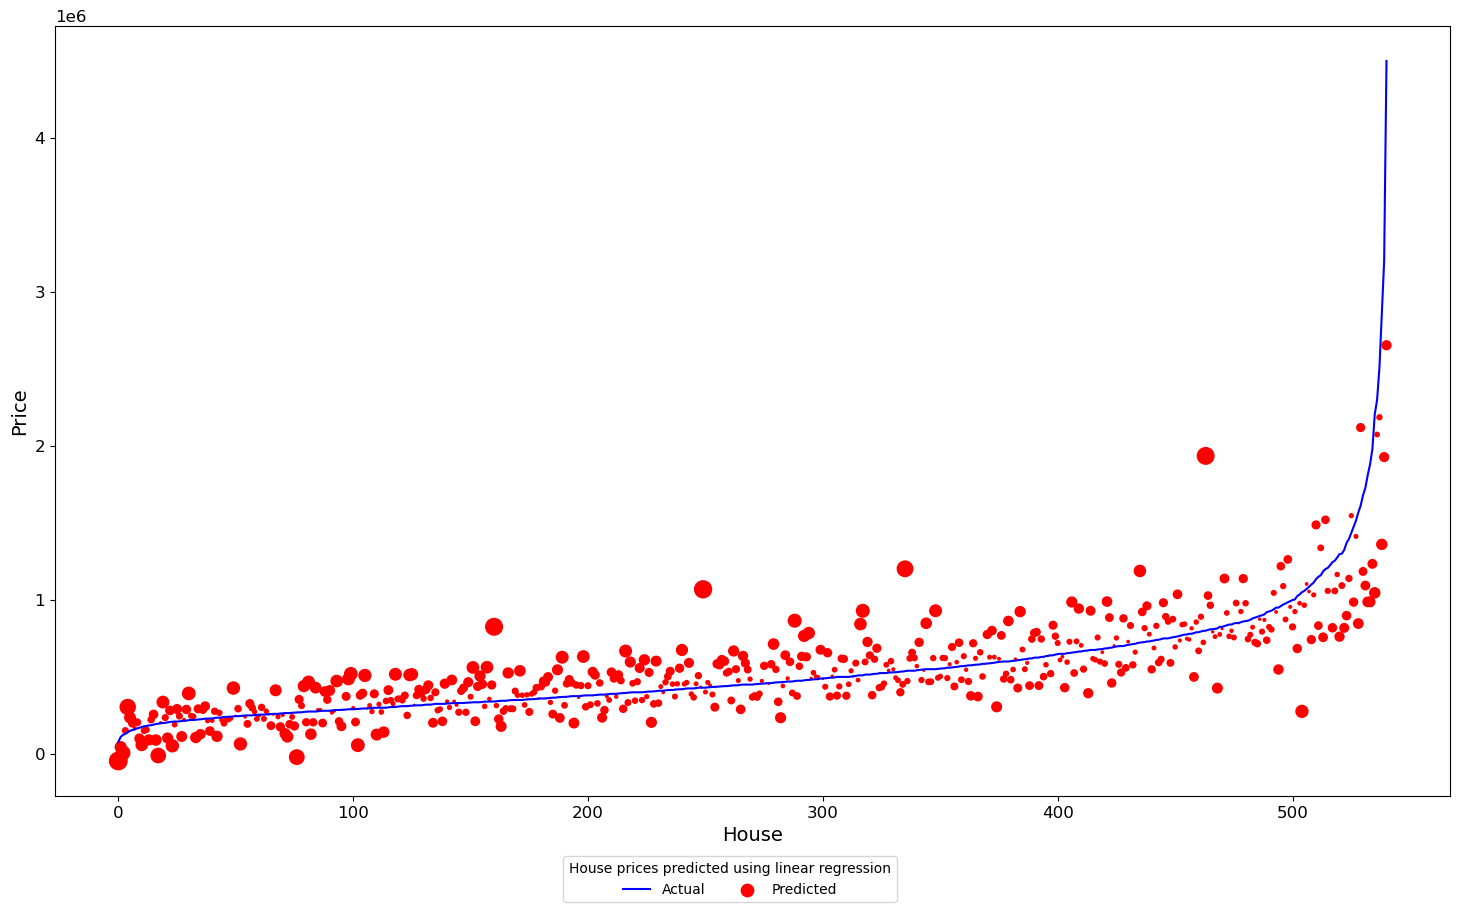

In [17]:
def predicted_actual_comparison(chart_description):

    N = 10  # Plot every Nth value to save time and resources
    predictions_dataframe = predictions.sort_values("price")[::N]

    predictions_dataframe["diff"] = (
        predictions_dataframe["price"] - predictions_dataframe["predicted"]
    )
    predictions_dataframe["recnum"] = np.arange(len(predictions_dataframe))
    predictions_dataframe["error_pct"] = (
        abs(predictions_dataframe["diff"] / predictions_dataframe["price"]) * 100
    )

    ax = plt.figure(figsize=[18, 10])
    plt.ylabel("Price")
    plt.xlabel("House")
    plt.plot(
        predictions_dataframe["recnum"], predictions_dataframe["price"], color="blue"
    )

    plt.scatter(
        predictions_dataframe["recnum"],
        predictions_dataframe["predicted"],
        predictions_dataframe["error_pct"],
        color="red",
    )

    ax.legend(
        ["Actual", "Predicted"], loc="lower center", ncol=2, title=chart_description
    )

    plt.show()


# Compare the predicted prices to actual prices
predicted_actual_comparison("House prices predicted using linear regression")

- The larger the dot, the higher the percent of error.
- This chart can be used as a baseline to visually compare the quality of predictions as the model is improved.
- The dots shoud reduce in size and cluster closer to the blue line as the model improves.

### Managing Outliers

Checking the training data for outliers such as noise is one method of improving the model. Such anomolies could misguide the algorithm and obstruct the fit.

Eailier oservaations of the histograms for the price and bedrooms features revealed an inordinate amount of white space on the right side of the histogram. This suggest the possibilty of outliers in the higher range.

#### Identify Outliers - Box Plot

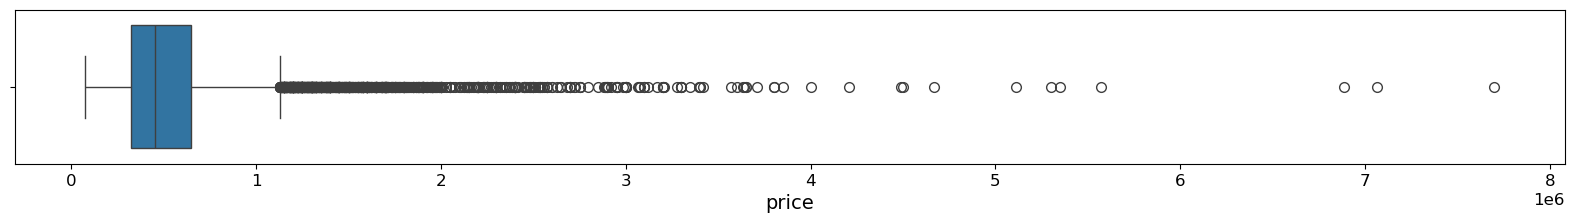

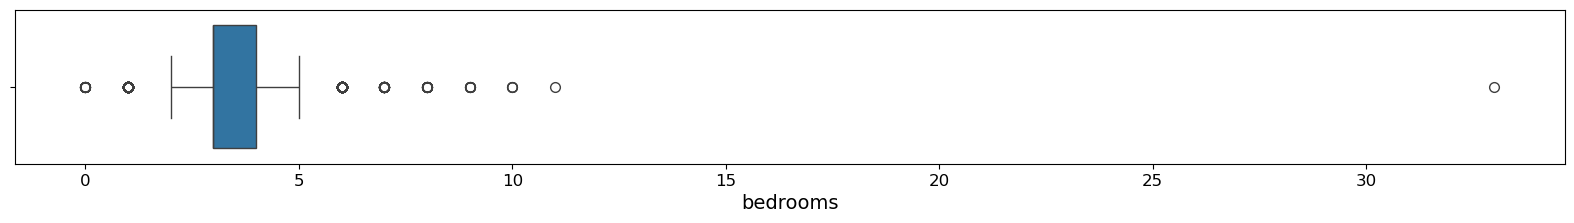

In [18]:
feature_list = ["price", "bedrooms"]

for feature in feature_list:
    plt.figure(figsize=(20, 2))
    bplot = sb.boxplot(x=feature, data=raw_housing_data, orient="h", fliersize=7)

- The distribution for the **price** values in the original housing dataset is shown in the upper boxplot. It shows that the middle 50% of price values occur around $500,000.
  
    - It has an extended tail on the right that cuts off at $5,500,000. A gap follows succeeded by three additional outliers to the right.

      
- The distribution for the **bedrooms** values in the original housing dataset is shown in the lower boxplot. It shows that the middle 50% of bedroom values occur around 4.

    - It has a short tail on the right that cuts off at 11 bedrooms. A gap follows succeeded by one additional outlier to the right which is likely an error.

### Examine Data Values in the Outliers

In [19]:
# Houses above $6,000,000 in value
data_train.loc[data_train_labels["price"] > 6000000]

,sqft_living,grade,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,yr_built,condition,long,zipcode
3914,10040,11,4.50,2,2360,5,47.6500,1,2.0,2001,37325,1940,3,-122.214,98004
9254,9890,13,7.75,4,1030,6,47.6305,0,2.0,0,31374,2001,3,-122.240,98039
7252,12050,13,8.00,3,3480,6,47.6298,0,2.5,1987,27600,1910,4,-122.323,98102


In [20]:
# Houses with 11 bedrooms or more
data_train.loc[data_train["bedrooms"] > 11]

,sqft_living,grade,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,yr_built,condition,long,zipcode
15870,1620,7,1.75,0,580,33,47.6878,0,1.0,0,6000,1947,5,-122.331,98103


- The above listings echoes what was present in the boxplots 
- The most expensive houses are listed in the top listing. All of these houses share the following similarities: high grade, high square footage, and numerous bedrooms and bathrooms. The price values are excluded since they are stored in the labels dataset.
- The listing on the bottom shows a home with 33 bedrooms which is definitely incorrect considering the home has 1620 square feet of living space. This can either be fixed or dropped from the training set.

    **Note** The dataset is large enough that the outliers may have a substantial impact. Removing them should not be an issue, however. 

### Drop Outliers - Training Dataset

In [21]:
print(f"{len(data_train):6d} houses in the training dataset")

# Keep only the rows for houses priced $6M or less
data_train = data_train.loc[data_train_labels["price"] <= 6000000]
data_train_labels = data_train_labels.loc[data_train_labels["price"] <= 6000000]
print(f"{len(data_train):6d} houses remain after dropping those priced over $6M")

# Keep only the rows for houses with 11 or fewer bedrooms
data_train_labels = data_train_labels.loc[data_train["bedrooms"] <= 11]
data_train = data_train.loc[data_train["bedrooms"] <= 11]
print(
    f"{len(data_train):6d} houses remain after dropping those with more than 11 bedrooms"
)

 16209 houses in the training dataset
 16206 houses remain after dropping those priced over $6M
 16205 houses remain after dropping those with more than 11 bedrooms


**16205 records remaining in the dataset after dropping the outliers.**

### Summary Statistis - Training Features

The continuation of the optimization of the model includes searching for additional problems with the training data. Next is to probe for data values that require adjusting in order to improve the linear regression model.

In [22]:
# Show statistics for the features that will be used in preparation for feature scaling.
with pd.option_context("float_format", "{:.2f}".format):
    print(data_train["sqft_living"].describe(), "\n")
    print(data_train_labels["price"].describe())

count   16205.00
mean     2071.71
std       899.46
min       290.00
25%      1427.00
50%      1910.00
75%      2544.00
max      9640.00
Name: sqft_living, dtype: float64 

count     16205.00
mean     536227.60
std      348666.79
min       75000.00
25%      320000.00
50%      450000.00
75%      640000.00
max     5110800.00
Name: price, dtype: float64


- There is a vast difference in scale between sqft_living and price
- sqft_living min and max values are 290 and 9640, correspondingly

### Compare Scale and Distribution - Price and Sqft_living

Maximum price = 5110800.0
Maximum sqft_living = 9640.0


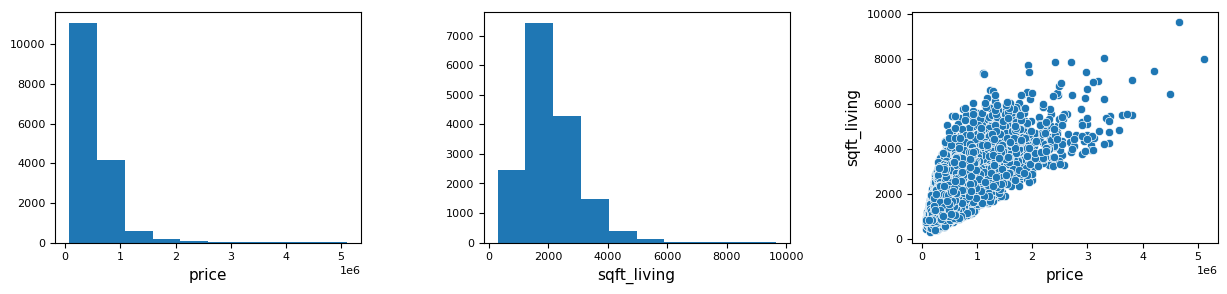

In [23]:
# Compare the scale and the distribution of price and sqft_living
def compare_price_sqft_living():

    print(
        "Maximum price =",
        data_train_labels.loc[data_train_labels["price"].idxmax()]["price"],
    )
    print(
        "Maximum sqft_living =",
        data_train.loc[data_train["sqft_living"].idxmax()]["sqft_living"],
    )

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(wspace=0.4)

    plt.rc("axes", titlesize=9)  # fontsize of the axes title
    plt.rc("axes", labelsize=11)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=8)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=8)  # fontsize of the tick labels

    ax1 = fig.add_subplot(1, 3, 1)
    plt.xlabel("price")
    plt.hist(data_train_labels["price"], label="price")

    ax2 = fig.add_subplot(1, 3, 2)
    plt.xlabel("sqft_living")
    plt.hist(data_train["sqft_living"], label="sqft_living")

    # View the relationship between price and sqft_living
    ax2 = fig.add_subplot(1, 3, 3)
    sb.scatterplot(x=data_train_labels["price"], y=data_train["sqft_living"])


compare_price_sqft_living()

- The visualization shows the  maximum price is 5,110,800 and the maximum sqft_living is 9,640. Notice the great difference in scales.
- The two histograms on the left show right-skewed distributions for price and sqft_living
- The scatter plot chart to the right displays a conical dispersion. This indicates that the values for price and sqft_living spread differently. The result is a lack of homoscedasticity and a condition called heteroscedasticity where the error term magnifies or diminishes parallel to the fluctuations with the predictor variable.
- The values for these two features will require normalization to align in scale and spread.